In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
from sklearn.decomposition import NMF
import seaborn as sns
import gseapy as gp
import numpy as np
from scipy.cluster.hierarchy import linkage, cophenet
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist

In [47]:
# Anndata object path
cells_adata_path_A1 = (
    "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

cells_adata_path_D1 = (
    "../Data/skin_TXK6Z4X_D1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

# Cropped whole slide image
wsi_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif"

# Cell boundaries image
cells_layer_path = "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png"

In [48]:
adata_A1 = sc.read_h5ad(cells_adata_path_A1)
adata_D1 = sc.read_h5ad(cells_adata_path_D1)

In [49]:
cell_list = [
    "ID_61915",
    "ID_62110",
    "ID_62246",
    "ID_62328",
    "ID_62370",
    "ID_62932",
    "ID_62970",
    "ID_63004",
    "ID_63061",
    "ID_63084",
    "ID_63123",
    "ID_63131",
    "ID_63358",
    "ID_63389",
    "ID_63493",
    "ID_63500",
    "ID_63505",
    "ID_63553",
    "ID_63592",
    "ID_63617",
    "ID_63623",
    "ID_63703",
    "ID_63747",
    "ID_63801",
    "ID_63961",
    "ID_64028",
    "ID_64066",
    "ID_64123",
    "ID_64208",
    "ID_64234",
    "ID_64236",
    "ID_64356",
    "ID_64403",
    "ID_64602",
    "ID_64755",
    "ID_64771",
    "ID_64784",
    "ID_64806",
    "ID_64826",
    "ID_64866",
    "ID_64974",
    "ID_65090",
    "ID_65261",
    "ID_65308",
    "ID_65324",
    "ID_65334",
    "ID_65413",
    "ID_65443",
    "ID_65463",
    "ID_65477",
    "ID_65530",
    "ID_65608",
    "ID_65661",
    "ID_65753",
    "ID_65812",
    "ID_65909",
    "ID_65967",
    "ID_65994",
    "ID_66061",
    "ID_66097",
    "ID_66183",
    "ID_66202",
    "ID_66224",
    "ID_66238",
    "ID_66241",
    "ID_66259",
    "ID_66511",
    "ID_66528",
    "ID_66732",
    "ID_66739",
    "ID_66838",
    "ID_66925",
    "ID_66935",
    "ID_66955",
    "ID_67012",
    "ID_67089",
    "ID_67094",
    "ID_67140",
    "ID_67252",
    "ID_67260",
    "ID_67320",
    "ID_67331",
    "ID_67385",
    "ID_67464",
    "ID_67533",
    "ID_67537",
    "ID_67551",
    "ID_67640",
    "ID_67644",
    "ID_67658",
    "ID_67675",
    "ID_67729",
    "ID_67796",
    "ID_67822",
    "ID_67879",
    "ID_67893",
    "ID_67959",
    "ID_67971",
    "ID_68066",
    "ID_68074",
    "ID_68268",
    "ID_68284",
    "ID_68320",
    "ID_68380",
    "ID_68491",
    "ID_68493",
    "ID_68579",
    "ID_68581",
    "ID_68587",
    "ID_68649",
    "ID_68688",
    "ID_68714",
    "ID_68741",
    "ID_68833",
    "ID_68940",
    "ID_68954",
    "ID_69109",
    "ID_69110",
    "ID_69160",
    "ID_69219",
    "ID_69238",
    "ID_69402",
    "ID_69408",
    "ID_69477",
    "ID_69664",
    "ID_69744",
    "ID_69746",
    "ID_69824",
    "ID_69886",
    "ID_69932",
    "ID_70009",
    "ID_70021",
    "ID_70126",
    "ID_70143",
    "ID_70207",
    "ID_70243",
    "ID_70321",
    "ID_70375",
    "ID_70376",
    "ID_70405",
    "ID_70448",
    "ID_70534",
    "ID_71563",
    "ID_71652",
    "ID_71708",
    "ID_71719",
    "ID_71834",
    "ID_71902",
    "ID_71929",
    "ID_72008",
    "ID_72296",
    "ID_72392",
    "ID_72412",
    "ID_72422",
    "ID_72451",
    "ID_72546",
    "ID_72793",
    "ID_73078",
    "ID_73086",
    "ID_73517",
    "ID_73561",
    "ID_73773",
    "ID_73803",
    "ID_73838",
    "ID_73907",
    "ID_73928",
    "ID_73943",
    "ID_74007",
    "ID_74066",
    "ID_74117",
    "ID_74118",
    "ID_74179",
    "ID_74262",
    "ID_74488",
    "ID_74505",
    "ID_74666",
    "ID_74835",
    "ID_74930",
    "ID_74944",
    "ID_75032",
    "ID_75211",
    "ID_75283",
    "ID_75346",
    "ID_75452",
    "ID_75574",
    "ID_75604",
    "ID_75692",
    "ID_75764",
    "ID_75798",
    "ID_75904",
    "ID_75965",
    "ID_75990",
    "ID_76031",
    "ID_76249",
    "ID_76317",
    "ID_76319",
    "ID_76350",
    "ID_76382",
    "ID_76473",
    "ID_76588",
    "ID_76603",
    "ID_76685",
    "ID_76776",
    "ID_76819",
    "ID_76925",
    "ID_76939",
    "ID_76957",
    "ID_77008",
    "ID_77010",
    "ID_77029",
    "ID_77049",
    "ID_77082",
    "ID_77192",
    "ID_77232",
    "ID_77251",
    "ID_77257",
    "ID_77466",
    "ID_77496",
    "ID_77569",
    "ID_77628",
    "ID_77833",
    "ID_78166",
    "ID_78421",
    "ID_78423",
    "ID_78693",
    "ID_78766",
    "ID_78779",
    "ID_78845",
    "ID_78893",
    "ID_78932",
    "ID_79072",
    "ID_79136",
    "ID_79260",
    "ID_79352",
    "ID_79597",
    "ID_79604",
    "ID_79644",
    "ID_79693",
    "ID_79700",
    "ID_79963",
    "ID_79992",
    "ID_80008",
    "ID_80026",
    "ID_80100",
    "ID_80112",
    "ID_80437",
    "ID_80575",
    "ID_80691",
    "ID_80802",
    "ID_81099",
    "ID_81124",
    "ID_81133",
    "ID_62667",
    "ID_63036",
    "ID_63048",
    "ID_64693",
    "ID_64992",
    "ID_65053",
    "ID_65431",
    "ID_65681",
    "ID_65926",
    "ID_65987",
    "ID_66242",
    "ID_66276",
    "ID_66307",
    "ID_66316",
    "ID_66634",
    "ID_66699",
    "ID_66728",
    "ID_66896",
    "ID_67330",
    "ID_67437",
    "ID_67715",
    "ID_67746",
    "ID_67958",
    "ID_68053",
    "ID_68194",
    "ID_68198",
    "ID_68327",
    "ID_68625",
    "ID_68750",
    "ID_69300",
    "ID_69310",
    "ID_69325",
    "ID_69455",
    "ID_69488",
    "ID_69927",
    "ID_69937",
    "ID_70063",
    "ID_70089",
    "ID_70152",
    "ID_70265",
    "ID_70421",
    "ID_72086",
    "ID_72283",
    "ID_72850",
    "ID_73242",
    "ID_73510",
    "ID_74061",
    "ID_74194",
    "ID_74348",
    "ID_74557",
    "ID_74811",
    "ID_75149",
    "ID_75408",
    "ID_75573",
    "ID_75635",
    "ID_75772",
    "ID_75813",
    "ID_76053",
    "ID_76183",
    "ID_76299",
    "ID_76504",
    "ID_76509",
    "ID_76872",
    "ID_77027",
    "ID_77570",
    "ID_77757",
    "ID_77777",
    "ID_77804",
    "ID_77888",
    "ID_78222",
    "ID_78308",
    "ID_78497",
    "ID_78789",
    "ID_78921",
    "ID_78982",
    "ID_79321",
    "ID_79479",
    "ID_79521",
    "ID_79562",
    "ID_79842",
    "ID_80147",
    "ID_80413",
    "ID_80511",
    "ID_80582",
    "ID_80626",
    "ID_80781",
    "ID_81058",
]

In [50]:
len(cell_list)

339

In [51]:
adata_region = adata_A1[cell_list, :].copy()
expr_matrix = adata_region.X
if not isinstance(expr_matrix, np.ndarray):
    expr_matrix = expr_matrix.toarray()

In [52]:
def compute_cophenetic(W):
    try:
        dist = pdist(W.T)
        linkage_matrix = linkage(dist, method='average')
        coph_corr, _ = cophenet(linkage_matrix, dist)
        return coph_corr
    except Exception:
        return np.nan

def auto_select_nmf_k_from_expr(expr_matrix, k_range=range(2, 21), n_repeats=5, random_state=42, coph_threshold=0.99):
    """
    parameters:
        expr_matrix: numpy.ndarray, shape (cells/spots, genes)
        k_range: k ranges
        n_repeats: each k repeat n_repeats times
        random_state: random seed
        coph_threshold: cophenetic correlation threshold(0.99)
        
    return:
        best_k: best k
        results: list(k, average cophenetic, average reconstruction error)
    """
    results = []

    for k in k_range:
        cophs = []
        errors = []
        for i in range(n_repeats):
            nmf = NMF(n_components=k, init='nndsvda', random_state=random_state+i, max_iter=1000)
            W = nmf.fit_transform(expr_matrix)
            H = nmf.components_
            recon = np.dot(W, H)
            error = np.linalg.norm(expr_matrix - recon)
            coph = compute_cophenetic(W)
            errors.append(error)
            cophs.append(coph)

        avg_coph = np.nanmean(cophs)
        avg_error = np.mean(errors)
        results.append((k, avg_coph, avg_error))

    # filtered cophenetic equals to nan
    valid_results = [(k, coph) for k, coph, _ in results if not np.isnan(coph)]

    # choose the min k with the first cophenetic >= 0.99
    for k, coph in valid_results:
        if coph >= coph_threshold:
            return k, results

    # choose the max k with the first cophenetic >= 0.99
    best_k = max(valid_results, key=lambda x: x[1])[0]
    return best_k, results


In [53]:
best_k, k_results = auto_select_nmf_k_from_expr(expr_matrix)
print("best k:", best_k)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: R

best k: 10


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


In [54]:
for k, coph, err in k_results:
    print(f"k={k}, Cophenetic={coph:.3f}, Error={err:.2f}")

k=2, Cophenetic=nan, Error=17.63
k=3, Cophenetic=0.693, Error=15.36
k=4, Cophenetic=0.899, Error=13.41
k=5, Cophenetic=0.942, Error=11.44
k=6, Cophenetic=0.960, Error=10.73
k=7, Cophenetic=0.968, Error=10.13
k=8, Cophenetic=0.977, Error=9.49
k=9, Cophenetic=0.980, Error=8.98
k=10, Cophenetic=0.993, Error=8.74
k=11, Cophenetic=0.992, Error=8.24
k=12, Cophenetic=0.993, Error=7.77
k=13, Cophenetic=0.994, Error=7.44
k=14, Cophenetic=0.995, Error=7.17
k=15, Cophenetic=0.995, Error=6.90
k=16, Cophenetic=0.995, Error=6.68
k=17, Cophenetic=0.995, Error=6.37
k=18, Cophenetic=0.996, Error=6.03
k=19, Cophenetic=0.996, Error=5.82
k=20, Cophenetic=0.996, Error=5.61


In [55]:
n_components = best_k
nmf_model = NMF(n_components=n_components, init='nndsvda', random_state=42)
W = nmf_model.fit_transform(expr_matrix)
H = nmf_model.components_ 

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Trying n_neighbors = 5
Silhouette score for n_neighbors=5: 0.145
Trying n_neighbors = 10
Silhouette score for n_neighbors=10: 0.114
Trying n_neighbors = 15
Silhouette score for n_neighbors=15: 0.094
Trying n_neighbors = 20


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=20: 0.089
Trying n_neighbors = 30
Silhouette score for n_neighbors=30: 0.008

Silhouette scores for different n_neighbors:
n_neighbors = 5, silhouette score = 0.145
n_neighbors = 10, silhouette score = 0.114
n_neighbors = 15, silhouette score = 0.094
n_neighbors = 20, silhouette score = 0.089
n_neighbors = 30, silhouette score = 0.008

Best n_neighbors based on silhouette score: 5


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


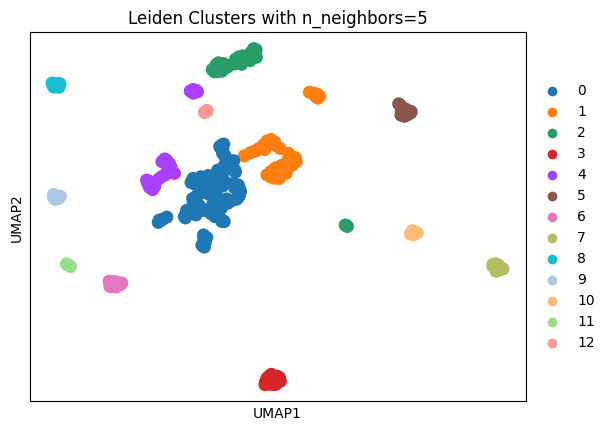

In [57]:
adata_region.obsm['X_nmf'] = W

# finding the best n_neighbors for leiden clustering
def compute_silhouette_scores(adata, n_neighbors_list=[5, 10, 15, 20, 30]):
    silhouette_scores = {}

    for n_neighbors in n_neighbors_list:
        print(f"Trying n_neighbors = {n_neighbors}")
        # calculate neighbors
        sc.pp.neighbors(adata, use_rep='X_nmf', n_neighbors=n_neighbors)

        # leiden clustering
        sc.tl.leiden(adata, resolution=0.5)
        
        # calculate silhouette score
        labels = adata.obs['leiden'].astype(int)
        silhouette_avg = silhouette_score(adata.obsm['X_nmf'], labels)

        silhouette_scores[n_neighbors] = silhouette_avg
        print(f"Silhouette score for n_neighbors={n_neighbors}: {silhouette_avg:.3f}")
    
    return silhouette_scores

sil_scores = compute_silhouette_scores(adata_region, n_neighbors_list=[5, 10, 15, 20, 30])

print("\nSilhouette scores for different n_neighbors:")
for n, score in sil_scores.items():
    print(f"n_neighbors = {n}, silhouette score = {score:.3f}")

# find the best n_neighbors based on silhouette score
best_n_neighbors = max(sil_scores, key=sil_scores.get)
print(f"\nBest n_neighbors based on silhouette score: {best_n_neighbors}")

sc.pp.neighbors(adata_region, use_rep='X_nmf', n_neighbors=best_n_neighbors)
sc.tl.leiden(adata_region, resolution=0.1)

sc.tl.umap(adata_region)
sc.pl.umap(adata_region, color='leiden', title=f'Leiden Clusters with n_neighbors={best_n_neighbors}')

/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T/ipykernel_13384/3441284533.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = df_W.groupby("cluster").mean()


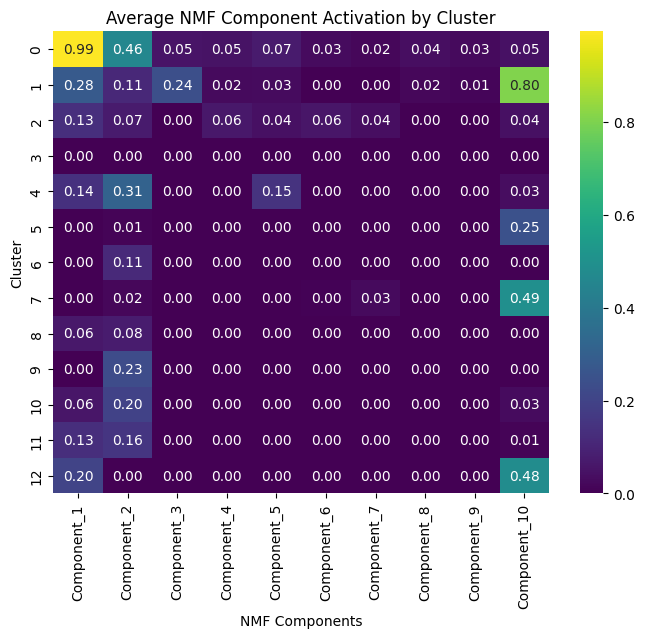

In [59]:
clusters = adata_region.obs['leiden']

# convert W to a DataFrame for easier manipulation
df_W = pd.DataFrame(W, index=adata_region.obs_names,
                    columns=[f"Component_{i+1}" for i in range(W.shape[1])])
df_W["cluster"] = clusters.values

# calculate the average activation of each NMF component for each cluster
cluster_means = df_W.groupby("cluster").mean()

plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means, cmap="viridis", annot=True, fmt=".2f")
plt.title("Average NMF Component Activation by Cluster")
plt.xlabel("NMF Components")
plt.ylabel("Cluster")
plt.show()

In [60]:
cluster_means

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10
cluster,,,,,,,,,,
0,0.994388,0.459354,0.051877,0.049131,0.072974,0.028463,1.804709e-02,0.036753,0.025714,0.046540
1,0.278598,0.112178,0.238343,0.023320,0.030285,0.001663,4.093412e-05,0.015899,0.011774,0.804288
2,0.134344,0.071274,0.000148,0.063529,0.038853,0.055952,3.540969e-02,0.000926,0.000001,0.041277
3,0.000000,0.000000,0.000016,0.000117,0.000000,0.000000,0.000000e+00,0.001104,0.002055,0.000000
4,0.138154,0.309106,0.000509,0.000000,0.145059,0.001742,9.485356e-07,0.000681,0.003770,0.033310
5,0.000606,0.011374,0.001260,0.000000,0.000000,0.002769,2.670724e-05,0.002350,0.000000,0.248095
6,0.000000,0.114105,0.000335,0.000000,0.000000,0.001667,9.821806e-08,0.000000,0.000000,0.000000
7,0.000970,0.017521,0.002599,0.000000,0.000000,0.004043,2.646957e-02,0.003812,0.000000,0.492007
8,0.064138,0.077500,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.003869


In [61]:
# each cluster's cell ids
cell_ids_by_cluster = {
    cluster: adata_region.obs.index[adata_region.obs['leiden'] == cluster].tolist()
    for cluster in adata_region.obs['leiden'].unique()
}

cell_ids_by_cluster

{'0': ['ID_61915',
  'ID_62110',
  'ID_62370',
  'ID_63004',
  'ID_63084',
  'ID_63131',
  'ID_63747',
  'ID_64208',
  'ID_64234',
  'ID_64602',
  'ID_64755',
  'ID_64784',
  'ID_64866',
  'ID_65261',
  'ID_65413',
  'ID_65463',
  'ID_65477',
  'ID_65753',
  'ID_66241',
  'ID_66739',
  'ID_67140',
  'ID_67385',
  'ID_67464',
  'ID_67537',
  'ID_67551',
  'ID_67658',
  'ID_67675',
  'ID_67729',
  'ID_67822',
  'ID_67879',
  'ID_67893',
  'ID_68284',
  'ID_68380',
  'ID_68491',
  'ID_68493',
  'ID_68649',
  'ID_68741',
  'ID_68833',
  'ID_68940',
  'ID_69109',
  'ID_69238',
  'ID_69402',
  'ID_69408',
  'ID_69664',
  'ID_69824',
  'ID_70126',
  'ID_70207',
  'ID_70243',
  'ID_70376',
  'ID_70405',
  'ID_71563',
  'ID_71708',
  'ID_71902',
  'ID_71929',
  'ID_72412',
  'ID_73086',
  'ID_73561',
  'ID_73773',
  'ID_73803',
  'ID_73928',
  'ID_73943',
  'ID_74007',
  'ID_74117',
  'ID_74118',
  'ID_74666',
  'ID_74930',
  'ID_75211',
  'ID_75346',
  'ID_75692',
  'ID_75798',
  'ID_75904',
 

top genes:
Component_1: ['COL1A1', 'COL3A1', 'ENPP2', 'SLC12A2', 'NUCB2', 'ALX3', 'JUNB', 'TGIF1', 'ENG', 'SMOC2']
Component_2: ['COL3A1', 'EHD2', 'JUNB', 'BACE2', 'SEMG1', 'ACTA2', 'CD55', 'ZNF135', 'TSHR', 'MANF']
Component_3: ['CD74', 'PECAM1', 'S100A4', 'CREM', 'EHD2', 'SMOC2', 'GSTM3', 'CCL20', 'LRIG1', 'OR2B6']
Component_4: ['BGN', 'COL3A1', 'SLC12A2', 'JUNB', 'LRIG1', 'COL1A1', 'EPHB2', 'CREM', 'COL5A2', 'BACE2']
Component_5: ['COL5A2', 'TGIF1', 'SMOC2', 'COL1A1', 'FHL2', 'ENPP2', 'ENG', 'BGN', 'MANF', 'PDGFRA']
Component_6: ['MYL9', 'MANF', 'S100A4', 'CXCL8', 'EHD2', 'COL1A1', 'SLC12A2', 'COL3A1', 'NAPSA', 'OR13C8']
Component_7: ['PDGFRA', 'COL1A1', 'CXCL8', 'CCL20', 'COL3A1', 'BGN', 'COL5A2', 'PDPN', 'CD81', 'SLC17A1']
Component_8: ['PDPN', 'BACE2', 'LRIG1', 'SFTPB', 'TGIF1', 'S100A4', 'FHL2', 'ENPP2', 'ELF3', 'SEMG1']
Component_9: ['CD81', 'SMOC2', 'COL1A1', 'LRIG1', 'SYCE1', 'ELF3', 'COL3A1', 'SLC17A4', 'SLC17A1', 'SLC17A3']
Component_10: ['COL1A1', 'S100A4', 'JUNB', 'ENPP2'

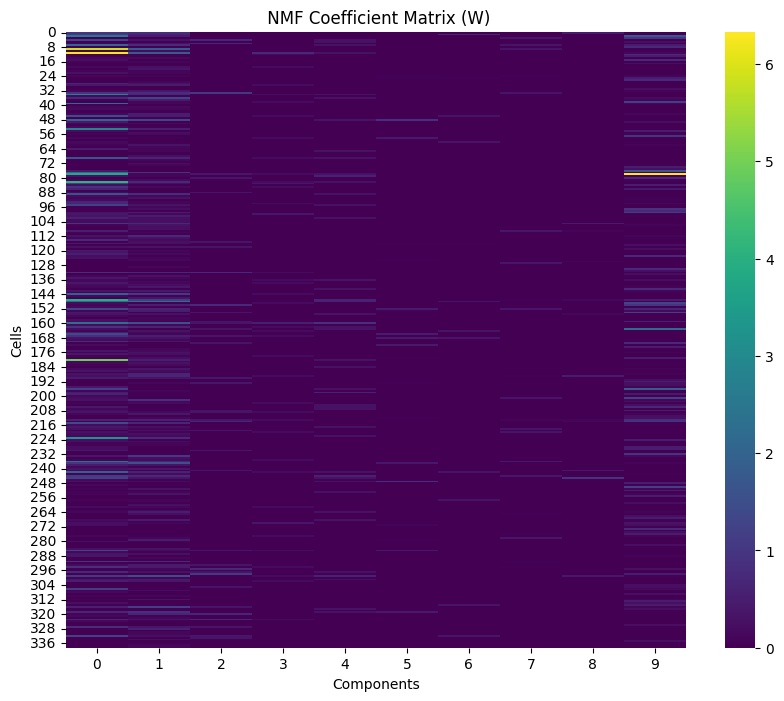

In [62]:
def get_top_genes(H, gene_names, top_n=10):
    top_genes = {}
    for i, comp in enumerate(H):
        # getting the indices of the top genes
        top_idx = np.argsort(comp)[::-1][:top_n]
        top_genes[f"Component_{i+1}"] = [gene_names[j] for j in top_idx]
    return top_genes

# get gene names from the adata object
gene_names = adata_A1.var_names.tolist()
top_genes = get_top_genes(H, gene_names, top_n=10)

print("top genes:")
for comp, genes in top_genes.items():
    print(f"{comp}: {genes}")

plt.figure(figsize=(10, 8))
sns.heatmap(W, cmap="viridis", cbar=True)
plt.title(" NMF Coefficient Matrix (W)")
plt.xlabel("Components")
plt.ylabel("Cells")
plt.show()

In [63]:
top_genes = get_top_genes(H, gene_names, top_n=10)

go_results = {}

for comp, genes in top_genes.items():
    print(f"analyzing {comp} ...")
    enr = gp.enrich(
        gene_list=genes,
        gene_sets="../Data/c5.go.v2024.1.Hs.symbols.gmt",
        outdir=None,
        cutoff=0.5,
    )

    if not enr.results.empty:
        go_results[comp] = enr.results
        print(enr.results.head(3))
    else:
        print(f"{comp} no GO results found.")

analyzing Component_1 ...
                       Gene_set  \
0  c5.go.v2024.1.Hs.symbols.gmt   
1  c5.go.v2024.1.Hs.symbols.gmt   
2  c5.go.v2024.1.Hs.symbols.gmt   

                                                Term Overlap   P-value  \
0                   GOBP_ACIDIC_AMINO_ACID_TRANSPORT    1/67  0.033886   
1                      GOBP_ADAPTIVE_IMMUNE_RESPONSE   1/756  0.327034   
2  GOBP_ADAPTIVE_IMMUNE_RESPONSE_BASED_ON_SOMATIC...   1/381  0.179336   

   Adjusted P-value  Odds Ratio  Combined Score    Genes  
0          0.080716   46.056589      155.889558  SLC12A2  
1          0.365383    3.909959        4.370128     JUNB  
2          0.229095    7.919012       13.608793     JUNB  
analyzing Component_2 ...
                       Gene_set                                  Term Overlap  \
0  c5.go.v2024.1.Hs.symbols.gmt    GOBP_ACTIN_FILAMENT_BASED_MOVEMENT   1/140   
1  c5.go.v2024.1.Hs.symbols.gmt     GOBP_ACTIN_FILAMENT_BASED_PROCESS   2/834   
2  c5.go.v2024.1.Hs.symbols.gmt

In [64]:
go_results['Component_1']

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ACIDIC_AMINO_ACID_TRANSPORT,1/67,0.033886,0.080716,46.056589,155.889558,SLC12A2
1,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ADAPTIVE_IMMUNE_RESPONSE,1/756,0.327034,0.365383,3.909959,4.370128,JUNB
2,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ADAPTIVE_IMMUNE_RESPONSE_BASED_ON_SOMATIC...,1/381,0.179336,0.229095,7.919012,13.608793,JUNB
3,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ALPHA_BETA_T_CELL_ACTIVATION,1/185,0.091063,0.143278,16.499358,39.535794,JUNB
4,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ALPHA_BETA_T_CELL_DIFFERENTIATION,1/127,0.063352,0.115276,24.136676,66.594427,JUNB
...,...,...,...,...,...,...,...,...
681,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TRANSMEMBRANE_RECEPTOR_PROTEIN_SERINE_THR...,1/19,0.009717,0.044143,165.964438,769.065743,ENG
682,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TRANSPORTER_ACTIVITY,1/1240,0.482173,0.499654,2.321543,1.693453,SLC12A2
683,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TYPE_II_TRANSFORMING_GROWTH_FACTOR_BETA_R...,1/11,0.005636,0.034519,292.533835,1514.919997,ENG
684,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TYPE_I_TRANSFORMING_GROWTH_FACTOR_BETA_RE...,1/11,0.005636,0.034519,292.533835,1514.919997,ENG


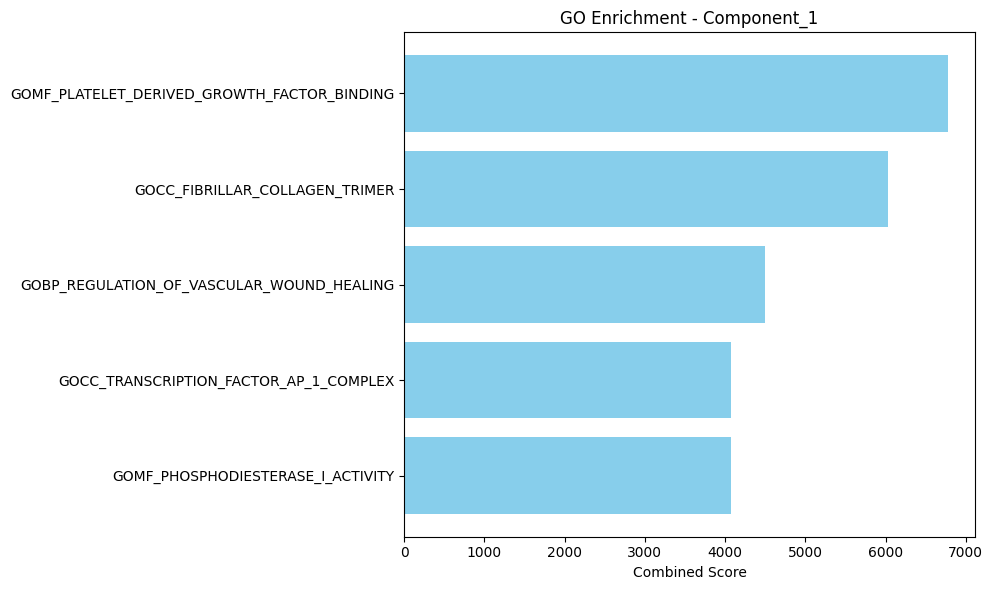

Component_2 no significant GO terms, skipping plot


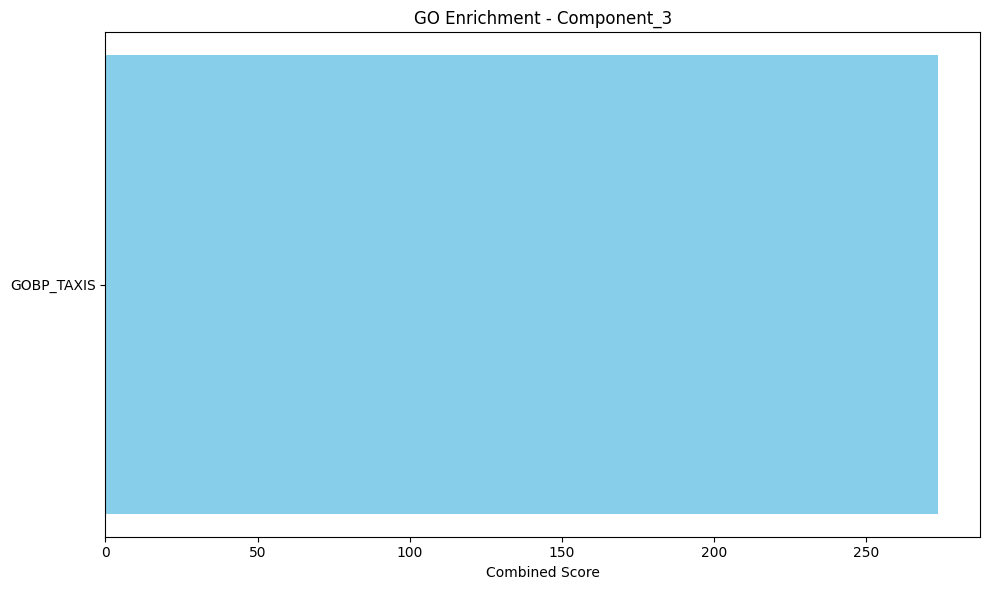

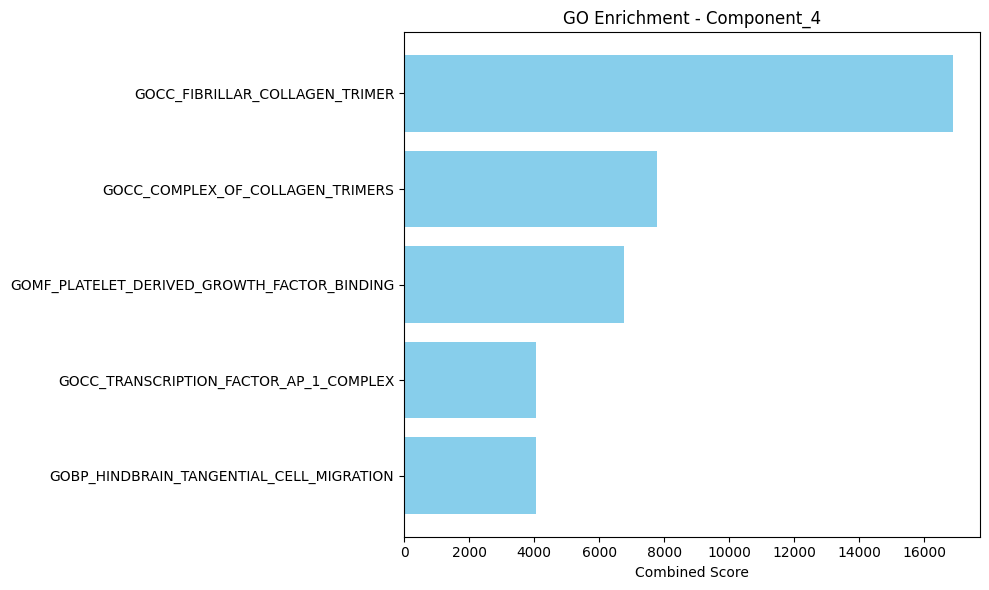

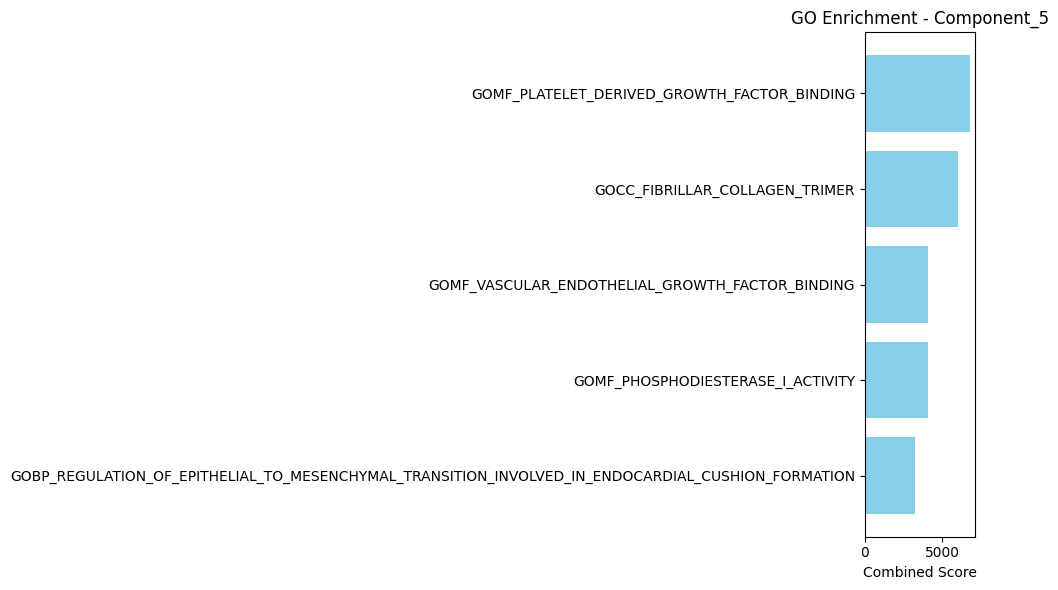

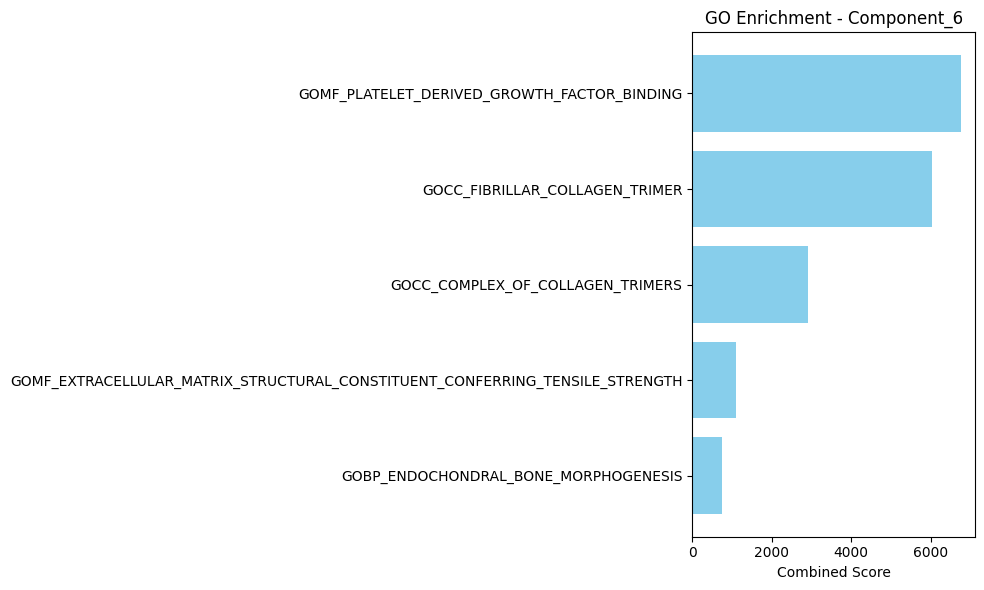

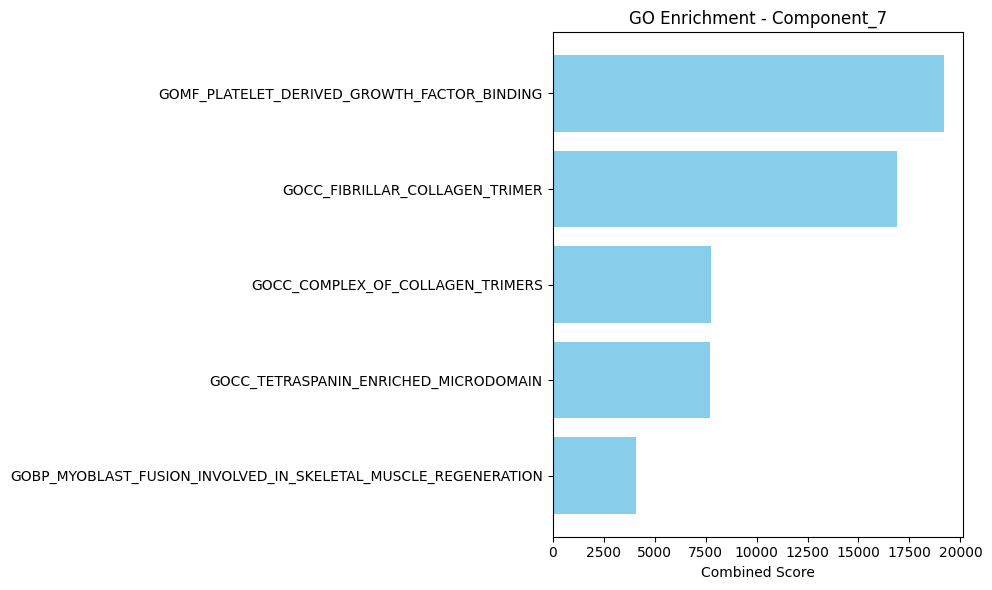

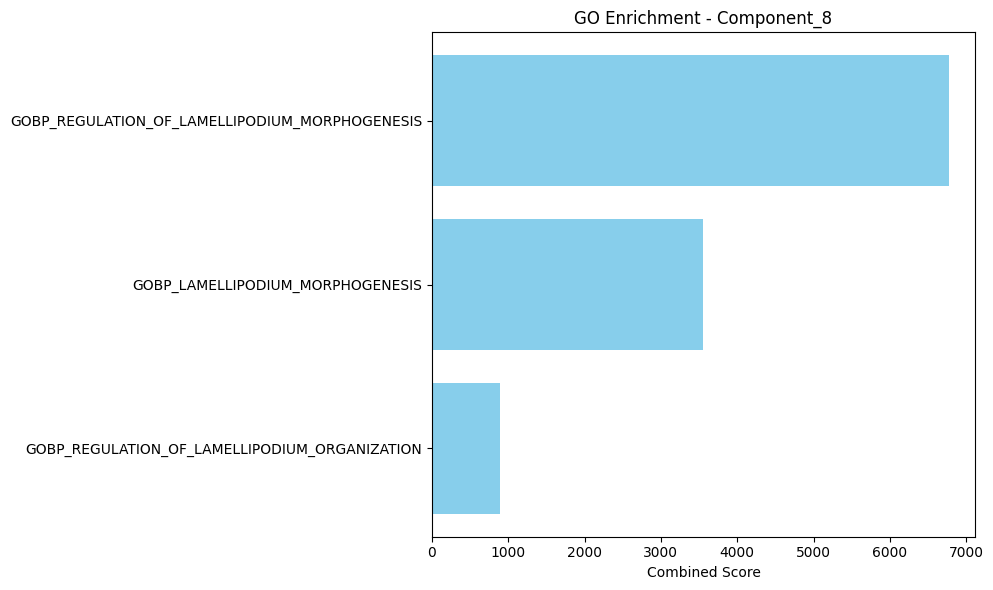

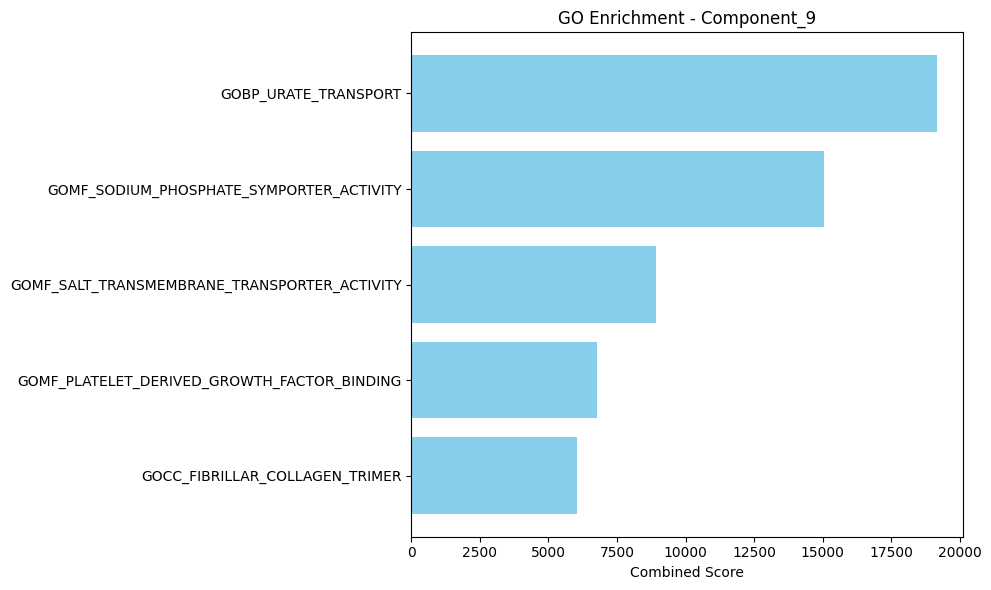

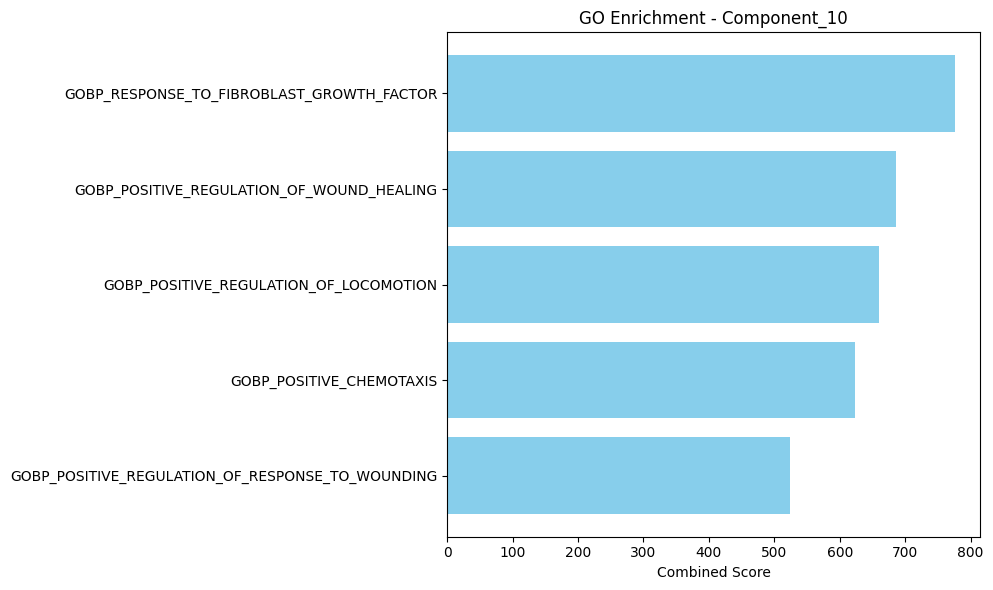

In [65]:
def plot_go_enrichment(go_results, top_n=5):
    for comp, df in go_results.items():
        # filter by Adjusted P-value(P-value < 0.05)
        sig = df[df['Adjusted P-value'] < 0.05]
        
        if sig.empty:
            print(f"{comp} no significant GO terms, skipping plot")
            continue

        # sorted and top 10 GO term
        sig = sig.sort_values('Combined Score', ascending=False).head(top_n)

        plt.figure(figsize=(10, 6))
        plt.barh(sig['Term'], sig['Combined Score'], color='skyblue')
        plt.xlabel('Combined Score')
        plt.title(f'GO Enrichment - {comp}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

plot_go_enrichment(go_results, top_n=5)
